In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, davies_bouldin_score

dataset = pd.read_csv('/content/tugas10.csv')
print('Sample Data')
dataset.head()

Sample Data


,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Overall rank,Country or region
0,1.340,1.587,0.986,0.596,0.153,0.393,1.0,Finland
1,1.383,1.573,0.996,0.592,0.252,0.410,2.0,Denmark
2,1.488,1.582,1.028,0.603,0.271,0.341,3.0,Norway
3,1.380,1.624,1.026,0.591,0.354,0.118,4.0,Iceland
4,1.396,1.522,0.999,0.557,0.322,0.298,5.0,Netherlands


In [2]:
dataset.isna().sum()

GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Overall rank                    0
Country or region               0
dtype: int64

In [3]:
dataset.dtypes

GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Overall rank                    float64
Country or region                object
dtype: object

In [5]:
x = dataset.iloc[:, :6]
y = dataset['Country or region']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=0)  

In [6]:
dt = DecisionTreeClassifier()
dt.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [7]:
print('Decision Tree Accuracy: {:.3f}'.format(accuracy_score(yTest, dt.predict(xTest))))

Decision Tree Accuracy: 0.000


[Text(0.018018018018018018, 0.9952380952380953, 'x[5] <= 0.002\ngini = 0.991\nsamples = 109\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]'),
 Text(0.009009009009009009, 0.9857142857142858, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.02702702702702703, 0.9857142857142858, 'x[5] <= 0.005\ngini = 0.991\nsamples = 108\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 

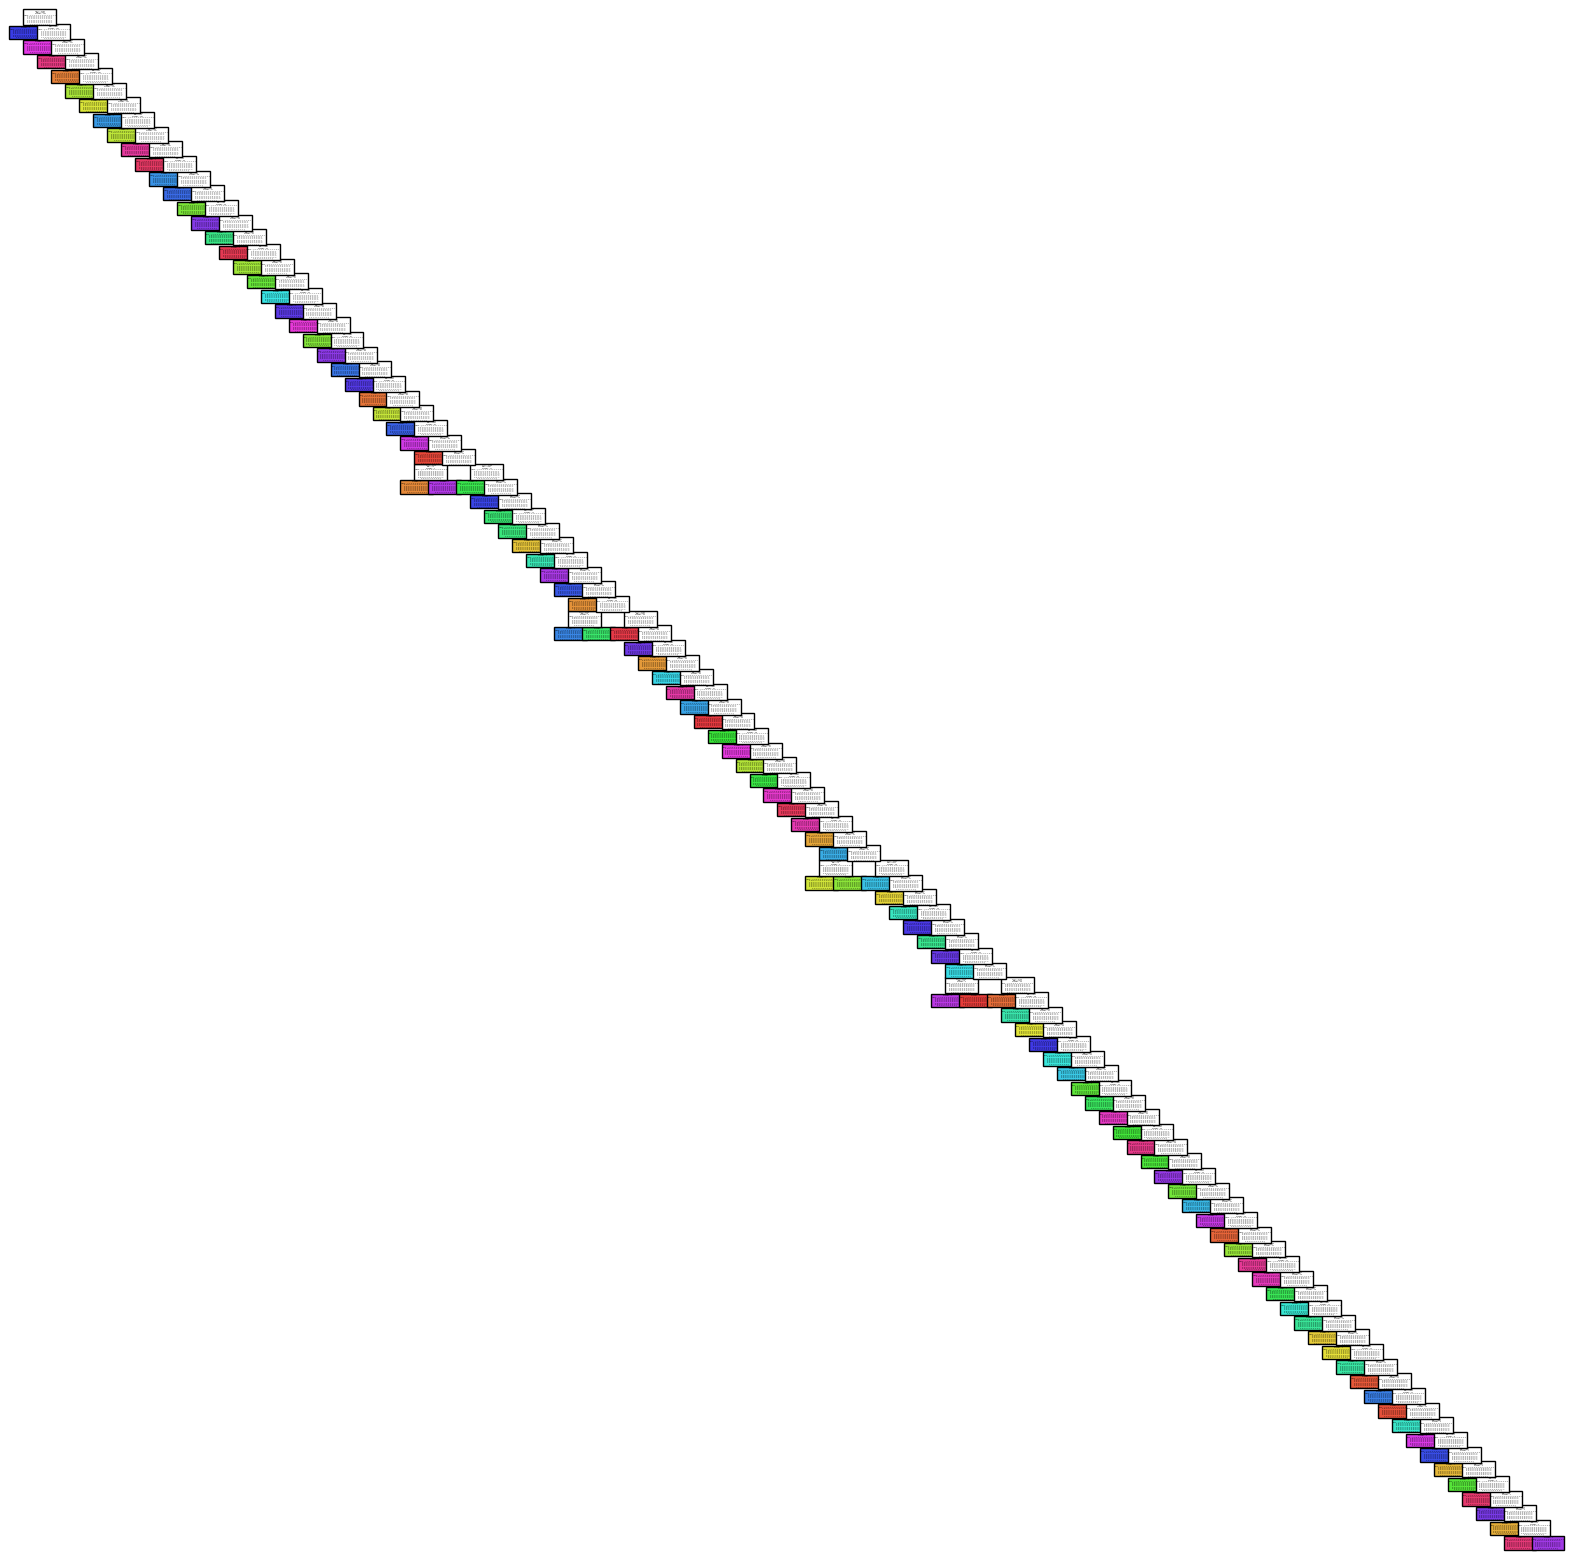

In [8]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt, filled=True)

In [9]:
kMeans = KMeans(n_clusters=5)
labels = kMeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
db_score = davies_bouldin_score(x, labels)
print(db_score)

1.2204857960838318


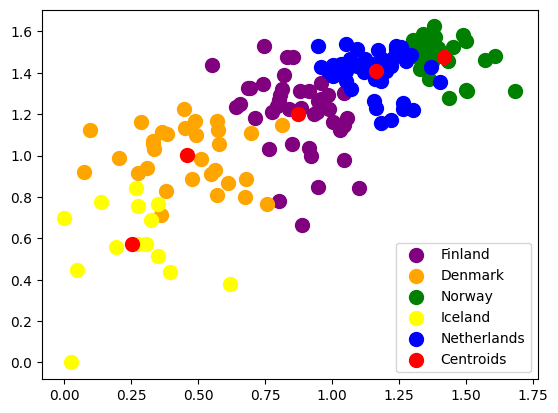

In [11]:
cols = dataset.columns
plt.scatter(x.loc[labels == 0, cols[0]], 
            x.loc[labels == 0, cols[1]],
            s=100, c='purple',
            label='Finland')
plt.scatter(x.loc[labels == 1, cols[0]],
            x.loc[labels == 1, cols[1]],
            s=100, c='orange',
            label='Denmark')
plt.scatter(x.loc[labels == 2, cols[0]],
            x.loc[labels == 2, cols[1]],
            s=100, c='green',
            label='Norway')
plt.scatter(x.loc[labels == 3, cols[0]],
            x.loc[labels == 3, cols[1]],
            s=100, c='yellow',
            label='Iceland')
plt.scatter(x.loc[labels == 4, cols[0]],
            x.loc[labels == 4, cols[1]],
            s=100, c='blue',
            label='Netherlands')
plt.scatter(kMeans.cluster_centers_[:, 0],
            kMeans.cluster_centers_[:, 1],
            s=100, c='Red',
            label='Centroids')

plt.legend()